## Visualization of filters

In this notebook, we want to visualize the trained filters of the model

In [57]:
%matplotlib inline
import sys
if ".." not in sys.path:
    sys.path.append("..")
    
from keras.models import load_model

channels = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']

model = load_model("models/model_cnn_1.h5")



In [58]:
weights, biases = model.layers[0].get_weights()

weights.shape

(14, 1, 1, 12)

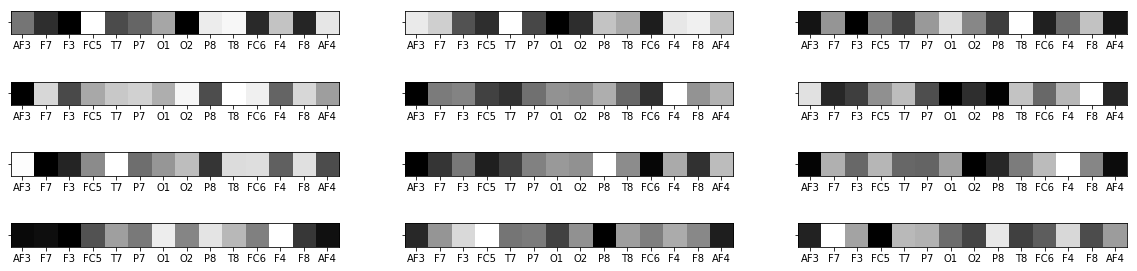

In [59]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (20, 5)

for i in range(12):
    plt.subplot(4,3,i+1)
    plt.imshow(weights[..., i].reshape(1, 14), cmap=plt.cm.gray_r)
    plt.xticks(range(14), channels)
    plt.yticks(range(1), [''])
    

plt.savefig("channel_filters.png")

Reading /home/jmperez/projects/corpora/P3Speller/P3Speller-old-y-datos/sets/PruebasMuseo_10229001.fdt
Reading 0 ... 63231  =      0.000 ...   493.992 secs...
0
(14, 1, 1, 12)
[ 0.00993005  0.06486604  0.10093082 -0.09816173  0.04209719  0.02198882
 -0.02867952  0.09982913 -0.08285281 -0.09164805  0.06792003 -0.05104904
  0.07199559 -0.07866913]


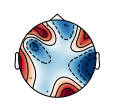

1
(14, 1, 1, 12)
[-0.07385007 -0.05470977  0.03236189  0.05823343 -0.08863507  0.04093042
  0.09099428  0.05910305 -0.04636896 -0.02786312  0.07043252 -0.07128371
 -0.07783346 -0.04432747]


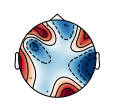

2
(14, 1, 1, 12)
[ 0.06352174 -0.02244915  0.07718129 -0.00833248  0.03282749 -0.02489775
 -0.07107998 -0.0129079   0.03560167 -0.09322134  0.05475421  0.00443763
 -0.05217743  0.06292082]


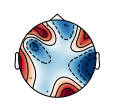

3
(14, 1, 1, 12)
[ 0.06445687 -0.01899449  0.03553514 -0.00063749 -0.01298452 -0.01636743
 -0.00294763 -0.03090378  0.0345603  -0.03445679 -0.02841155  0.02555372
 -0.01879366  0.00332435]


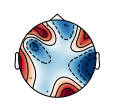

4
(14, 1, 1, 12)
[ 0.08447391  0.00143805 -0.00479104  0.0406029   0.05073418  0.008596
 -0.01385527 -0.0106741  -0.03299947  0.01476358  0.05237638 -0.0876088
 -0.01450711 -0.03576256]


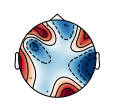

5
(14, 1, 1, 12)
[-0.157276    0.08070313  0.05112723 -0.05339771 -0.1113821   0.03059318
  0.13149187  0.07215627  0.12656015 -0.11886305 -0.00284086 -0.10359946
 -0.19621919  0.08355603]


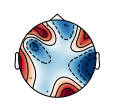

In [67]:
import mne
from p300.preprocessing import load_data_from_subject

filename = "/home/jmperez/projects/corpora/P3Speller/P3Speller-old-y-datos/sets/PruebasMuseo_10229001.set"
data_mne = mne.io.read_raw_eeglab(filename, preload=True, event_id={"0": 1, "1": 2})

plt.rcParams['figure.figsize'] = (20, 5)

for i in range(6):
    print(i)
    
    spatial_filter = weights[..., i].reshape(14)
    print(weights.shape)
    print(spatial_filter)
    plt.subplot(3,2,i+1)
    mne.viz.plot_topomap(a_filter, data_mne.info)

    

## Second Layer Filters

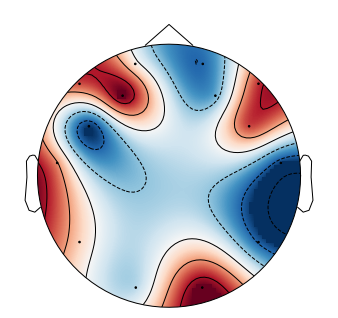

(<matplotlib.image.AxesImage at 0x7fa3b003dcf8>,
 <matplotlib.contour.QuadContourSet at 0x7fa3308f8400>)

In [72]:
spatial_filter = weights[..., 11].reshape(-1)
mne.viz.plot_topomap( a_filter, data_mne.info)

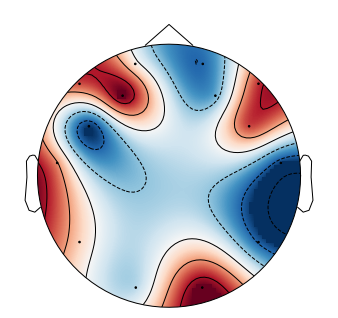

(<matplotlib.image.AxesImage at 0x7fa32fc50e80>,
 <matplotlib.contour.QuadContourSet at 0x7fa32fc2e1d0>)

In [62]:
spatial_filter = weights[..., 1].reshape(-1)
mne.viz.plot_topomap(a_filter, data_mne.info)

In [9]:
weights, biases = model.layers[1].get_weights()

weights.shape

(1, 13, 12, 60)